In [40]:
#import statements
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [41]:
#define the oscillatory function
def oscillatory_function(x, A, B, omega, phi):
    return A * np.sin(omega * x *np.pi + phi) + B

#define the oscillatory function
def poly3_function(x, a, b, c, d):
    return a*(x**3) + b*(x**2) + c*x + d

In [42]:
def minutes_to_hours(time_str):
    hours, minutes = map(int, time_str.split(':'))
    time = hours + (minutes / 60)

    return time

In [43]:
#get data from the data file
_, times, heights = np.loadtxt('ASTR19_F23_group_project_data.txt', dtype=
               [('day', 'i'), ('time', 'U5'), ('value', float)], skiprows=3, unpack=True)

#adjust times to numbers to be plotted
adjTimes = np.array([minutes_to_hours(time) for time in times])

Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF

In [44]:
y_err = np.full(len(times), .25)
even = np.linspace(np.min(adjTimes), np.max(adjTimes), 1000)
print(heights)
# Fit the function to the data
popt, pcov = curve_fit(poly3_function, adjTimes, heights, sigma=y_err)

[ 6.57 -0.39  5.38 -1.74  5.26 -1.36  4.13 -1.15  3.48 -1.61  2.62  0.05
  1.83  1.01  3.57  0.73  4.54  2.17  3.76  2.88  3.9   1.92  4.73  1.74
  5.66  0.79  5.33 -0.04  5.23 -1.12  6.67 -0.61  4.74 -0.93  4.69 -1.29
  4.2   0.22  3.68  0.26  2.47  0.36  2.59  0.99  4.1   1.87  3.17  1.6
  3.71  3.1   4.04  2.49  4.07  2.18  5.93  0.7   6.89  0.21  6.72  0.22
  6.77 -1.68  5.77 -1.32  4.35 -0.73  4.23 -0.38  2.24 -0.61  3.45 -0.46
  4.13  1.21  3.34  2.58  3.32  3.26  5.21  2.39  4.83  2.41]


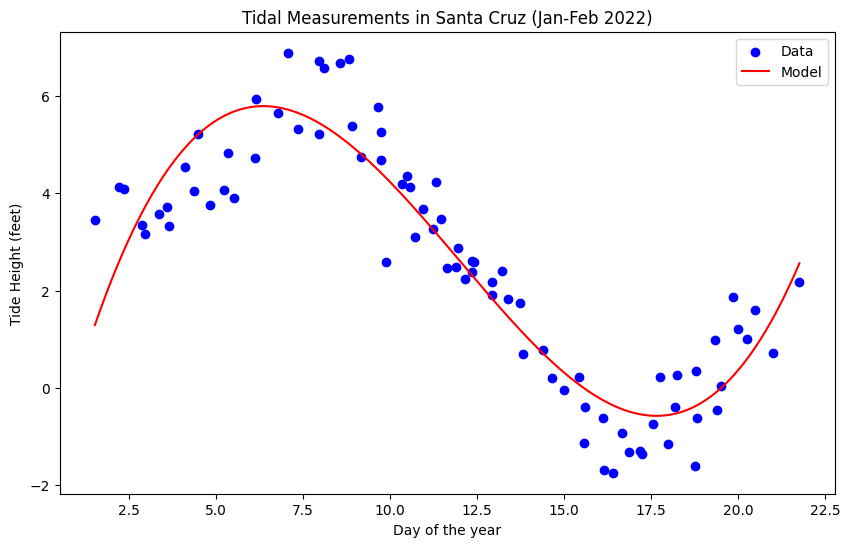

In [45]:
# Plot the data and model
plt.figure(figsize=(10, 6))
plt.scatter(adjTimes, heights, label='Data', color='blue')
plt.plot(even, oscillatory_function2(even, *popt), label='Model', color='red')
plt.xlabel('Day of the year')
plt.ylabel('Tide Height (feet)')
plt.title('Tidal Measurements in Santa Cruz (Jan-Feb 2022)')
plt.legend()
plt.savefig('tides_model.pdf')
plt.show()